---
title: "Python - COD"
---

<a href="https://colab.research.google.com/github/slds-lmu/lecture_sl/blob/main/exercises/cod-quarto/inserted/sol_cod_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [1]:
#| label: imports
"""
to replicate the results run:
`pip/conda/uv pip install numpy==1.26.4 matplotlib==3.8.4`
"""
import numpy as np
import matplotlib.pyplot as plt

# Defining the functions

## Euclidean length (L2 norm) of the sampled set

In [2]:
#| label: euclidean_length

# by default np.linalg.norm computes the L2 norm (Euclidean length)
# we set axis = 1 because our samples are our rows
def average_euclidean_length(x):
    return np.mean(np.linalg.norm(x, axis=1))

def variance_euclidean_length(x):
    return np.var(np.linalg.norm(x, axis=1))

## Euclidean distance (L2 norm) between the sampled sets

In [3]:
#| label: euclidean_distance

def average_euclidean_distances(x, x2):
    # Compute pairwise distances between x and x2
    distances = []
    for i in range(x.shape[0]):
        for j in range(x2.shape[0]):
            distances.append(np.linalg.norm(x[i] - x2[j]))
    return np.mean(distances)

def variance_euclidean_distances(x, x2):
    # Compute pairwise distances between x and x2
    distances = []
    for i in range(x.shape[0]):
        for j in range(x2.shape[0]):
            distances.append(np.linalg.norm(x[i] - x2[j]))
    return np.var(distances)

## Inner product between the sampled sets

In [4]:
#| label: inner_product

def average_inner_product(x, x2):
    # Compute inner products between rows of x and x2
    inner_products = []
    for i in range(x.shape[0]):
        for j in range(x2.shape[0]):
            inner_products.append(np.dot(x[i], x2[j]))
    return np.mean(inner_products)

def variance_inner_product(x, x2):
    # Compute inner products between rows of x and x2
    inner_products = []
    for i in range(x.shape[0]):
        for j in range(x2.shape[0]):
            inner_products.append(np.dot(x[i], x2[j]))
    return np.var(inner_products)

# Looping over various dimensionality options

In [5]:
#| label: loop_over_p

# Set seed for reproducibility
np.random.seed(5)

p_range = 2**np.arange(0, 11)  # 1, 2, 4, 8, ..., 1024
n = 100

avg_eucl_length = []
var_eucl_length = []
avg_eucl_dist = []
var_eucl_dist = []
avg_inner_prod = []
var_inner_prod = []

for p in p_range:
    # Generate random samples from multivariate normal distribution
    x = np.random.multivariate_normal(np.zeros(p), np.eye(p), n)
    x2 = np.random.multivariate_normal(np.zeros(p), np.eye(p), n)
    
    avg_eucl_length.append(average_euclidean_length(x))
    var_eucl_length.append(variance_euclidean_length(x))
    avg_eucl_dist.append(average_euclidean_distances(x, x2))
    var_eucl_dist.append(variance_euclidean_distances(x, x2))
    avg_inner_prod.append(average_inner_product(x, x2))
    var_inner_prod.append(variance_inner_product(x, x2))

# Visual inspection

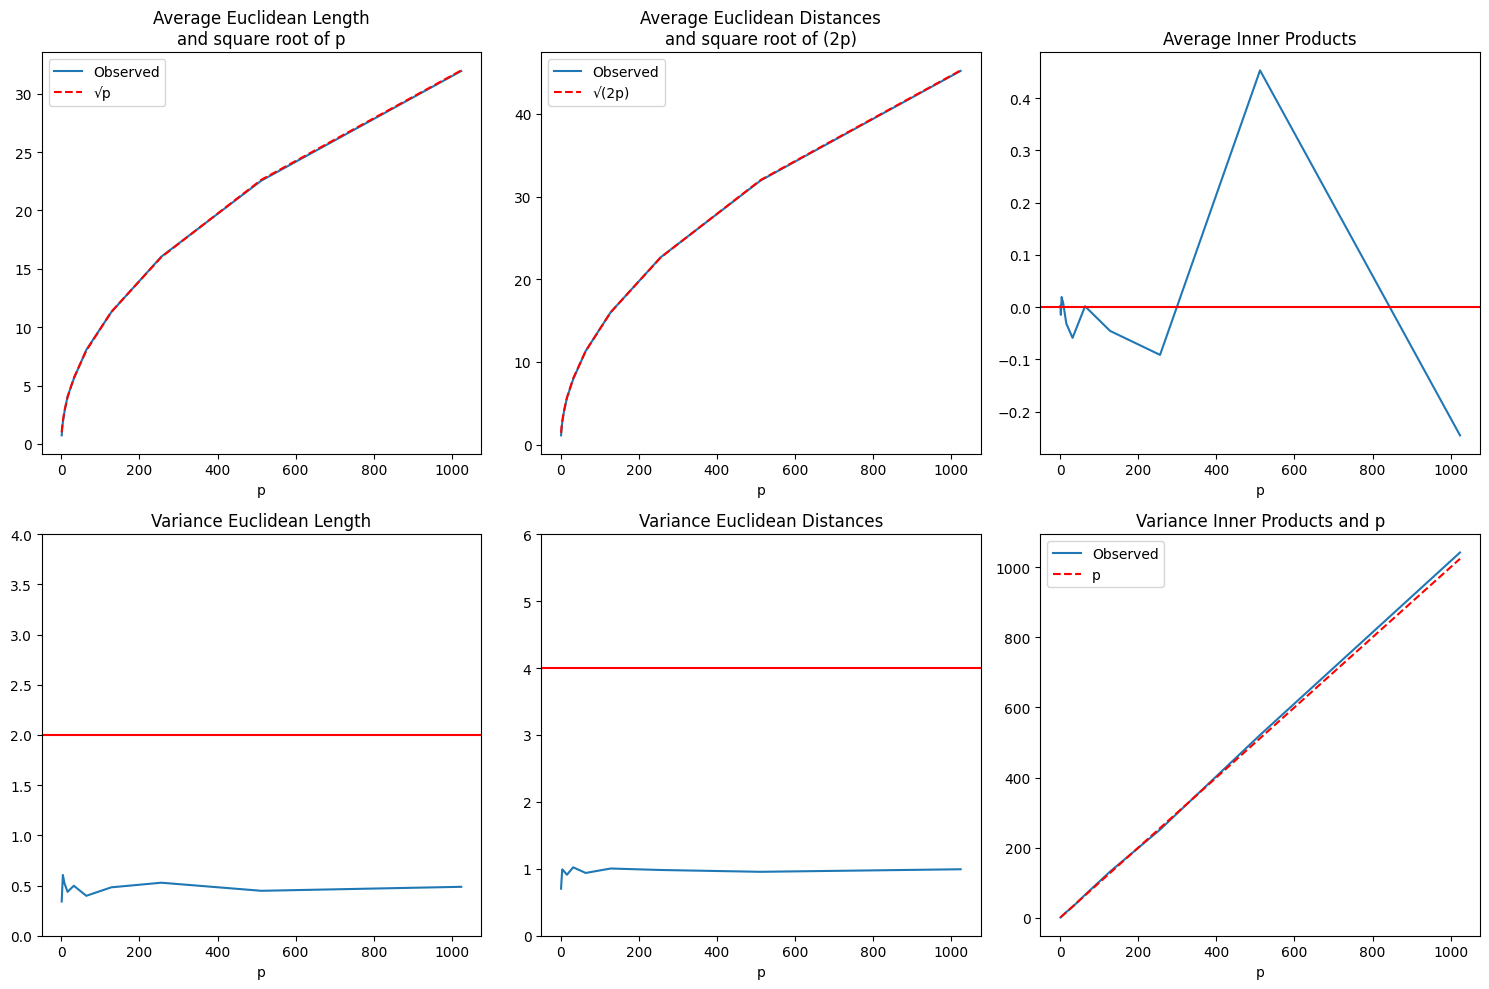

In [6]:
#| label: plots

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Average Euclidean Length
axes[0, 0].plot(p_range, avg_eucl_length, label='Observed')
axes[0, 0].plot(p_range, np.sqrt(p_range), 'r--', label='√p')
axes[0, 0].set_title('Average Euclidean Length\nand square root of p')
axes[0, 0].set_xlabel('p')
axes[0, 0].legend()

# Average Euclidean Distances
axes[0, 1].plot(p_range, avg_eucl_dist, label='Observed')
axes[0, 1].plot(p_range, np.sqrt(2*p_range), 'r--', label='√(2p)')
axes[0, 1].set_title('Average Euclidean Distances\nand square root of (2p)')
axes[0, 1].set_xlabel('p')
axes[0, 1].legend()

# Average Inner Products
axes[0, 2].plot(p_range, avg_inner_prod)
axes[0, 2].axhline(y=0, color='r', linestyle='-')
axes[0, 2].set_title('Average Inner Products')
axes[0, 2].set_xlabel('p')

# Variance Euclidean Length
axes[1, 0].plot(p_range, var_eucl_length)
axes[1, 0].axhline(y=2, color='r', linestyle='-')
axes[1, 0].set_title('Variance Euclidean Length')
axes[1, 0].set_xlabel('p')
axes[1, 0].set_ylim(0, 4)

# Variance Euclidean Distances
axes[1, 1].plot(p_range, var_eucl_dist)
axes[1, 1].axhline(y=4, color='r', linestyle='-')
axes[1, 1].set_title('Variance Euclidean Distances')
axes[1, 1].set_xlabel('p')
axes[1, 1].set_ylim(0, 6)

# Variance Inner Products
axes[1, 2].plot(p_range, var_inner_prod, label='Observed')
axes[1, 2].plot(p_range, p_range, 'r--', label='p')
axes[1, 2].set_title('Variance Inner Products and p')
axes[1, 2].set_xlabel('p')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Interpretation of plots

The plots confirm our results from the previous subpoints.

1. Average Euclidean Length - matches almost perfectly with $\sqrt{p}$, showing that as dimensionality increases, the average length of a Gaussian vector grows on the order of $\sqrt{p}$. 
2. Variance Euclidean Length - unlike the average, the variance does not grow with dimensionality, and never exceeds 2, indicating that the distribution of lengths remains stable regardless of dimensionality.
3. Average Euclidean distance - aligns almost exactly with $\sqrt{2p}$, showing that as dimensionality increases, two independent Gaussian vectors move apart on the order of $\sqrt{2p}$.
4. Variance Euclidean distance - as we saw for the variance of the lengths, the variance of the distances does not grow with dimensionality as well and never exceeds 2.
5. Average inner product - the average inner product is close to 0, some fluctuations still appear due to randomness, but the range of values on the y-axis is quite small.
6. Variance inner product - unlike the other variances, the variance of the inner product grows with dimensionality (in a perfect linear way)

# Full code

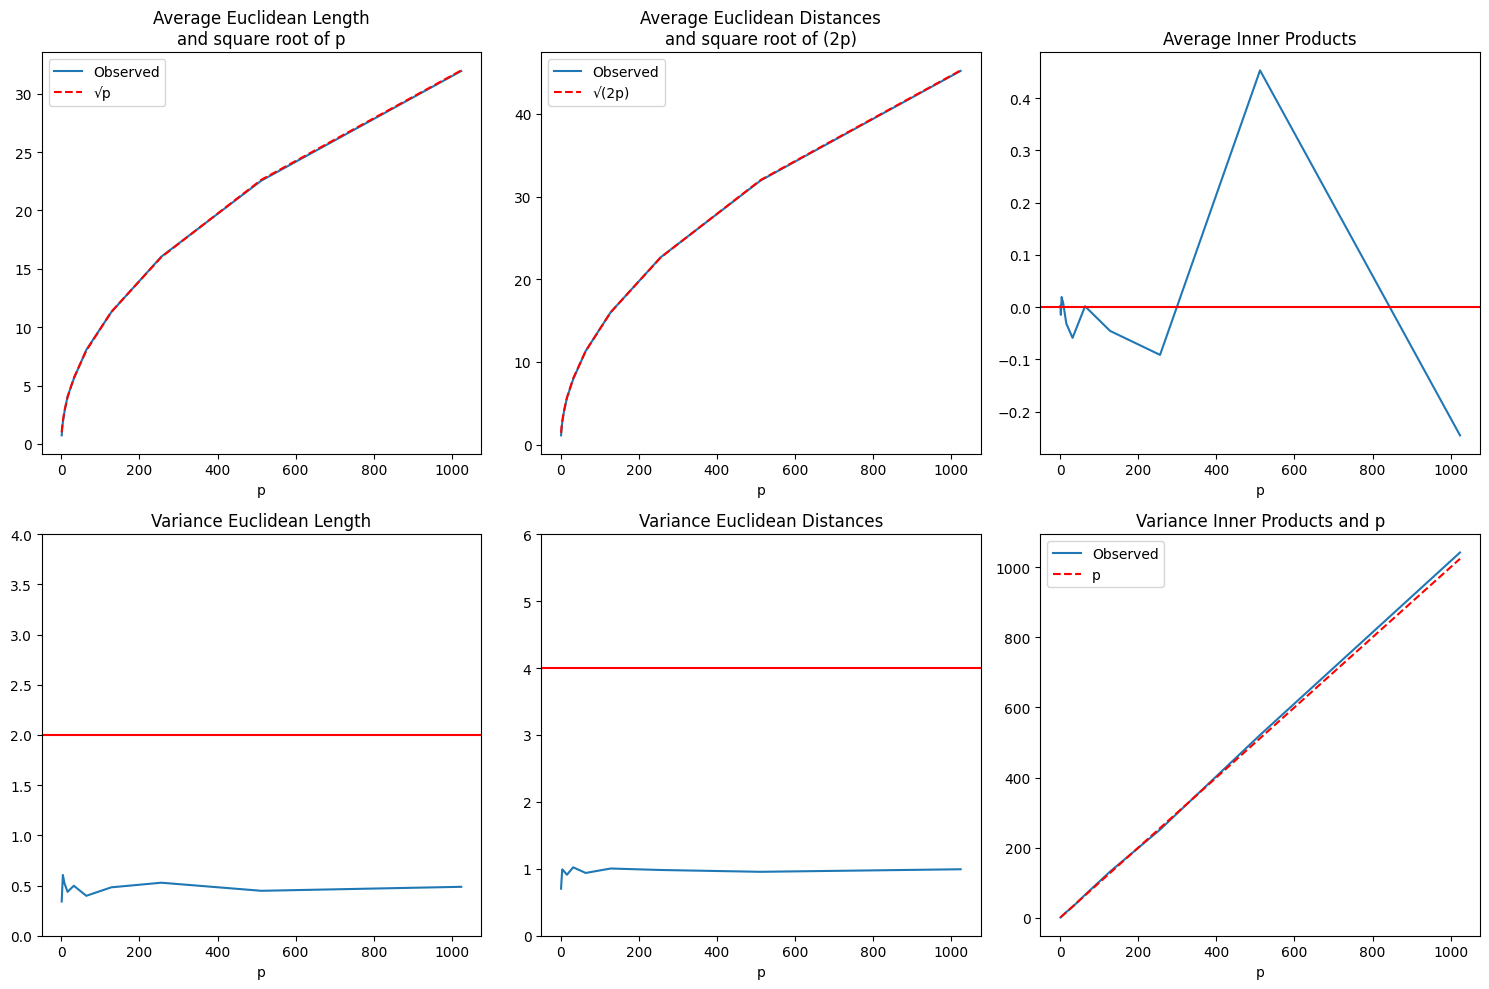

In [7]:
#| label: full_code

"""
to replicate the results run:
`pip/conda/uv pip install numpy==1.26.4 matplotlib==3.8.4`
"""
import numpy as np
import matplotlib.pyplot as plt

# Define functions
def average_euclidean_length(x):
    return np.mean(np.linalg.norm(x, axis=1))

def variance_euclidean_length(x):
    return np.var(np.linalg.norm(x, axis=1))

def average_euclidean_distances(x, x2):
    distances = []
    for i in range(x.shape[0]):
        for j in range(x2.shape[0]):
            distances.append(np.linalg.norm(x[i] - x2[j]))
    return np.mean(distances)

def variance_euclidean_distances(x, x2):
    distances = []
    for i in range(x.shape[0]):
        for j in range(x2.shape[0]):
            distances.append(np.linalg.norm(x[i] - x2[j]))
    return np.var(distances)

def average_inner_product(x, x2):
    inner_products = []
    for i in range(x.shape[0]):
        for j in range(x2.shape[0]):
            inner_products.append(np.dot(x[i], x2[j]))
    return np.mean(inner_products)

def variance_inner_product(x, x2):
    inner_products = []
    for i in range(x.shape[0]):
        for j in range(x2.shape[0]):
            inner_products.append(np.dot(x[i], x2[j]))
    return np.var(inner_products)

# Set seed for reproducibility
np.random.seed(5)

p_range = 2**np.arange(0, 11)  # 1, 2, 4, 8, ..., 1024
n = 100

avg_eucl_length = []
var_eucl_length = []
avg_eucl_dist = []
var_eucl_dist = []
avg_inner_prod = []
var_inner_prod = []

for p in p_range:
    # Generate random samples from multivariate normal distribution
    x = np.random.multivariate_normal(np.zeros(p), np.eye(p), n)
    x2 = np.random.multivariate_normal(np.zeros(p), np.eye(p), n)
    
    avg_eucl_length.append(average_euclidean_length(x))
    var_eucl_length.append(variance_euclidean_length(x))
    avg_eucl_dist.append(average_euclidean_distances(x, x2))
    var_eucl_dist.append(variance_euclidean_distances(x, x2))
    avg_inner_prod.append(average_inner_product(x, x2))
    var_inner_prod.append(variance_inner_product(x, x2))

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Average Euclidean Length
axes[0, 0].plot(p_range, avg_eucl_length, label='Observed')
axes[0, 0].plot(p_range, np.sqrt(p_range), 'r--', label='√p')
axes[0, 0].set_title('Average Euclidean Length\nand square root of p')
axes[0, 0].set_xlabel('p')
axes[0, 0].legend()

# Average Euclidean Distances
axes[0, 1].plot(p_range, avg_eucl_dist, label='Observed')
axes[0, 1].plot(p_range, np.sqrt(2*p_range), 'r--', label='√(2p)')
axes[0, 1].set_title('Average Euclidean Distances\nand square root of (2p)')
axes[0, 1].set_xlabel('p')
axes[0, 1].legend()

# Average Inner Products
axes[0, 2].plot(p_range, avg_inner_prod)
axes[0, 2].axhline(y=0, color='r', linestyle='-')
axes[0, 2].set_title('Average Inner Products')
axes[0, 2].set_xlabel('p')

# Variance Euclidean Length
axes[1, 0].plot(p_range, var_eucl_length)
axes[1, 0].axhline(y=2, color='r', linestyle='-')
axes[1, 0].set_title('Variance Euclidean Length')
axes[1, 0].set_xlabel('p')
axes[1, 0].set_ylim(0, 4)

# Variance Euclidean Distances
axes[1, 1].plot(p_range, var_eucl_dist)
axes[1, 1].axhline(y=4, color='r', linestyle='-')
axes[1, 1].set_title('Variance Euclidean Distances')
axes[1, 1].set_xlabel('p')
axes[1, 1].set_ylim(0, 6)

# Variance Inner Products
axes[1, 2].plot(p_range, var_inner_prod, label='Observed')
axes[1, 2].plot(p_range, p_range, 'r--', label='p')
axes[1, 2].set_title('Variance Inner Products and p')
axes[1, 2].set_xlabel('p')
axes[1, 2].legend()

plt.tight_layout()
plt.show()